In [164]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 

In [165]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [166]:
df.shape

(10000, 14)

In [167]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [169]:
Raw_df=df.copy() #Make another copy

# INDEXING

In [170]:
df.set_index("RowNumber", inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DROPING

In [171]:
df.drop(["CustomerId", "Surname"] ,axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [172]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


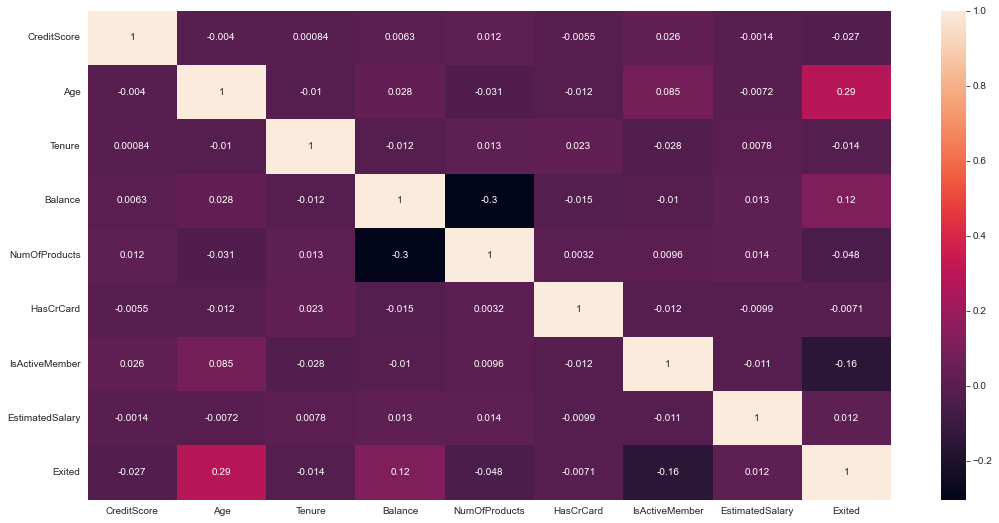

In [173]:
plt.figure(figsize=(18,9))
corrMat=df.corr()
sns.heatmap(corrMat, annot=True)
plt.show()

# GEOGRAPHY & GENDER ANALYSIS AND VISUALIZATION

In [174]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [175]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Geography')

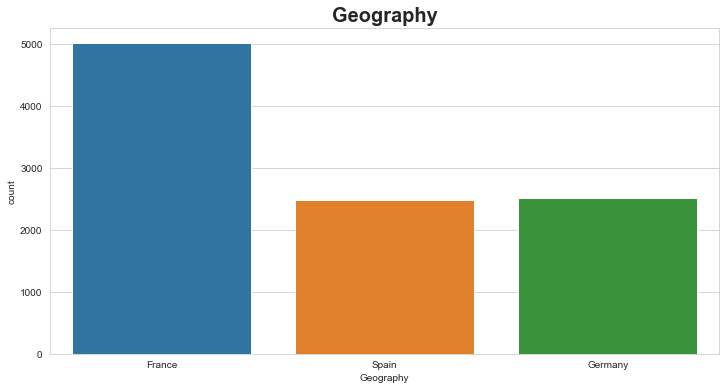

In [176]:
plt.figure(figsize=(12,6))
sns.countplot(x='Geography',data=df).set_title("Geography",fontsize=20,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

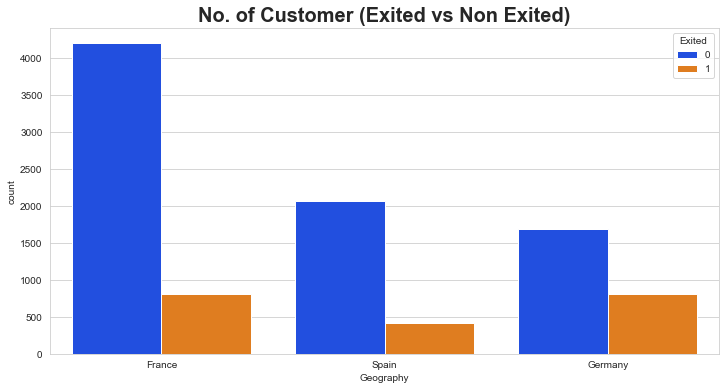

In [177]:
plt.figure(figsize=(12,6))
sns.countplot(x="Geography",hue="Exited",data=df,palette='bright')
plt.title("No. of Customer (Exited vs Non Exited)",fontsize=20,fontdict={"weight": "bold"})

In [178]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [179]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Sex')

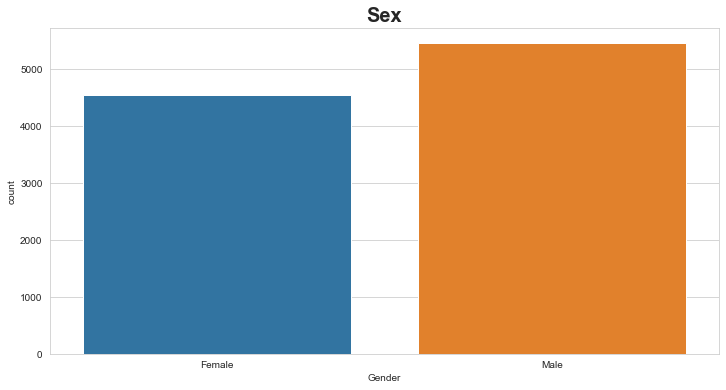

In [180]:
plt.figure(figsize=(12,6))
sns.countplot(x='Gender',data=df).set_title("Sex",fontsize=20,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'Sex (Exited vs Non Exited)')

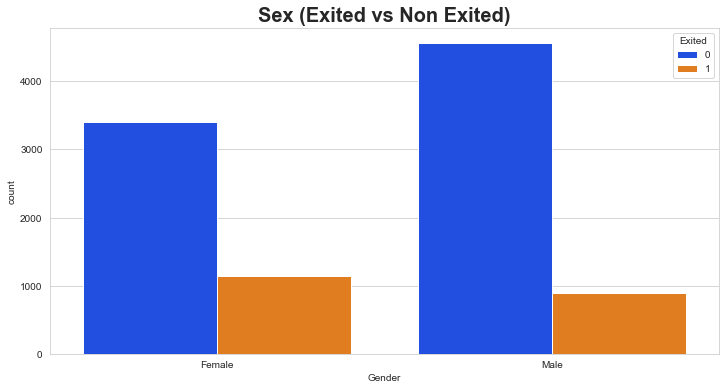

In [181]:
plt.figure(figsize=(12,6))
sns.countplot(x="Gender", hue="Exited",data=df,palette='bright')
plt.title("Sex (Exited vs Non Exited)",fontsize=20,fontdict={"weight": "bold"})

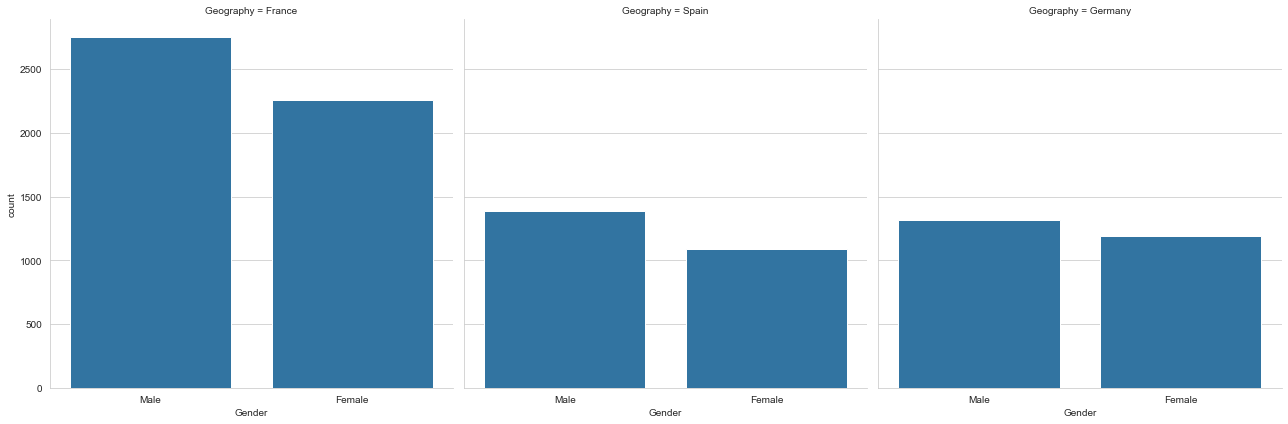

In [182]:
g = sns.FacetGrid(data=df, col="Geography", height=6, aspect=1)
g.map(sns.countplot, "Gender",  order=["Male", "Female"])

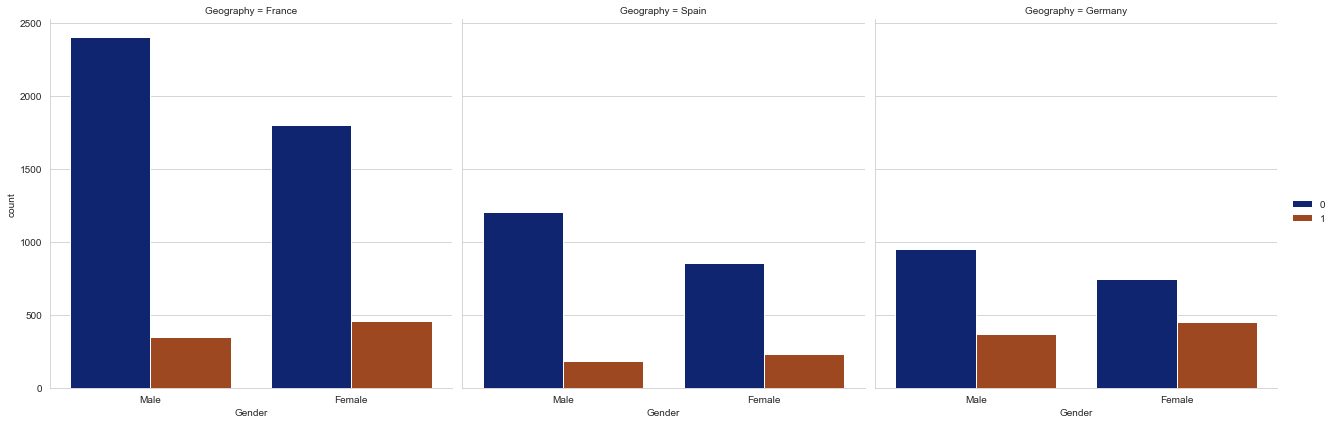

In [183]:
g = sns.FacetGrid(data=df, col="Geography", height=6, aspect=1)
g.map(sns.countplot, "Gender",hue="Exited" ,data=df,order=["Male", "Female"],palette="dark")
g.add_legend()  # 0 stands for Not Exited , 1 stands for Exited

# AGE ANALYSIS

In [184]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [185]:
df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [186]:
df["Age"].mean()

38.9218

In [187]:
df["Age"].mode()

0    37
Name: Age, dtype: int64

In [188]:
df["Age"].median()

37.0

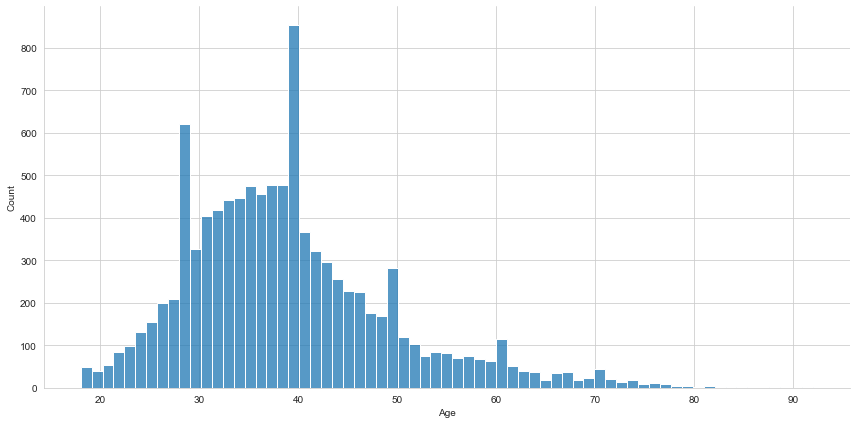

In [189]:
sns.displot(data=df, x="Age", height=6, aspect=2)

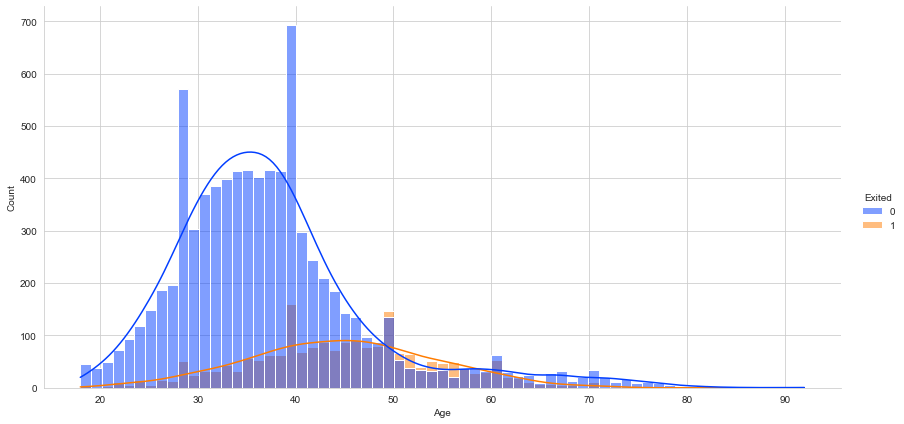

In [190]:
sns.displot(data=df, x="Age",hue="Exited",kind='hist', kde=True,palette="bright",height=6, aspect=2)

# TENURE

In [191]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [192]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

Text(0.5, 1.0, 'Tenure')

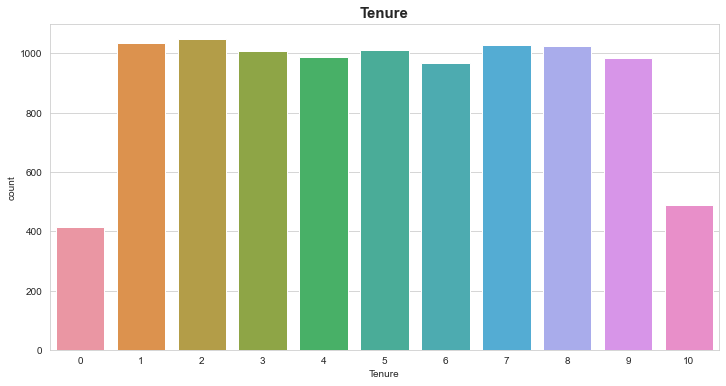

In [193]:
plt.figure(figsize=(12,6))
sns.countplot(x="Tenure",data=df).set_title("Tenure",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

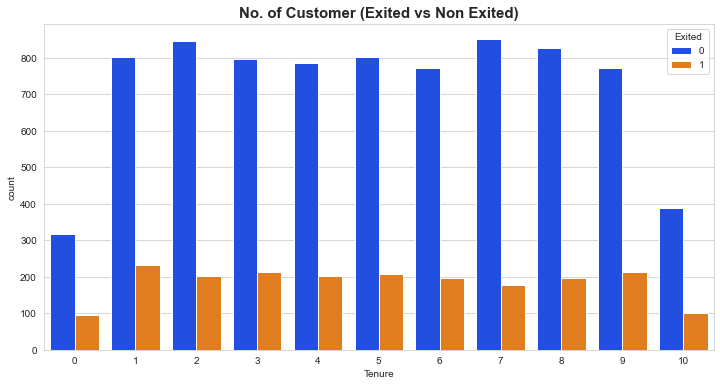

In [194]:
plt.figure(figsize=(12,6))
sns.countplot(x="Tenure",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# CREDIT CARD HOLDER

In [195]:
df['HasCrCard'].unique()

array([1, 0])

In [196]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

Text(0.5, 1.0, 'No.of  Credit Card Holder')

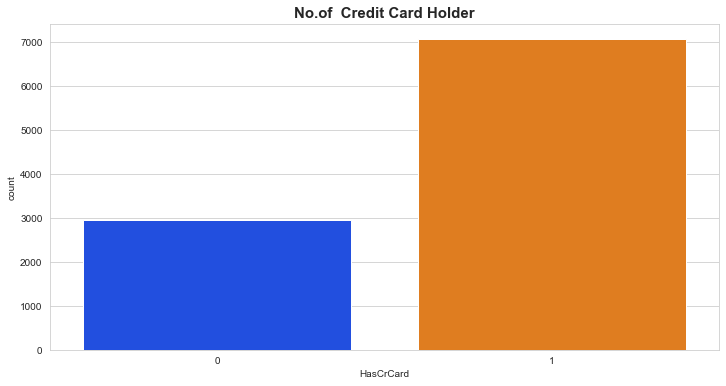

In [197]:
plt.figure(figsize=(12,6))
sns.countplot(x="HasCrCard",data=df,palette='bright').set_title("No.of  Credit Card Holder",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

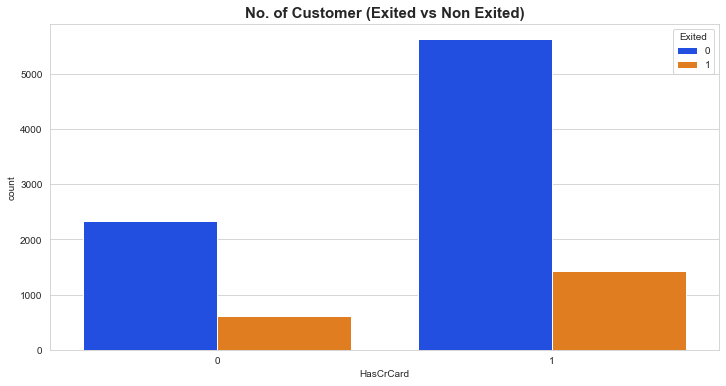

In [198]:
plt.figure(figsize=(12,6))
sns.countplot(x="HasCrCard",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# NUMBER OF PRODUCT

In [199]:
df["NumOfProducts"].unique()

array([1, 3, 2, 4])

In [200]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Text(0.5, 1.0, 'No. of Product')

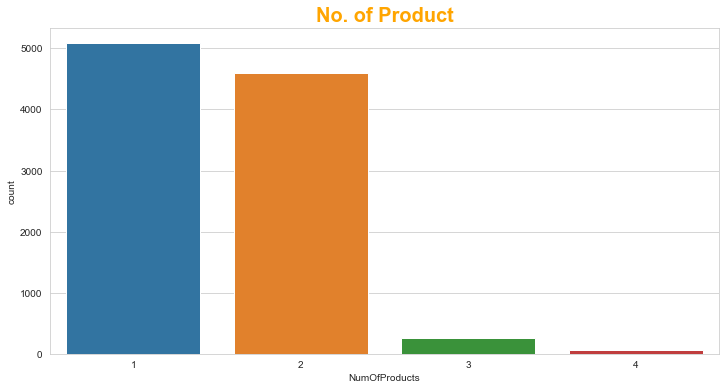

In [201]:
plt.figure(figsize=(12,6))
sns.countplot(x="NumOfProducts",data=df).set_title("No. of Product",fontsize=20,color="orange", fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

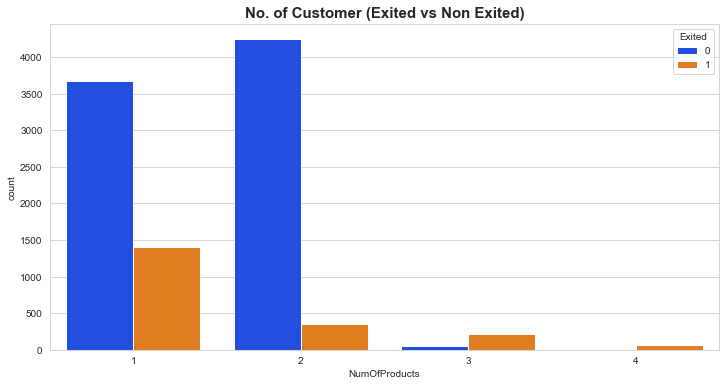

In [202]:
plt.figure(figsize=(12,6))
sns.countplot(x="NumOfProducts",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

# ACTIVE MEMBER

In [203]:
df["IsActiveMember"].unique()

array([1, 0])

In [204]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

Text(0.5, 1.0, 'ActiveMember')

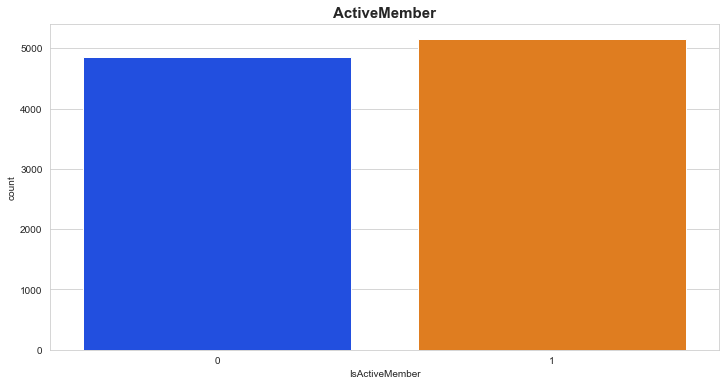

In [205]:
plt.figure(figsize=(12,6))
sns.countplot(x="IsActiveMember",data=df,palette='bright').set_title("ActiveMember",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'No. of Customer (Exited vs Non Exited)')

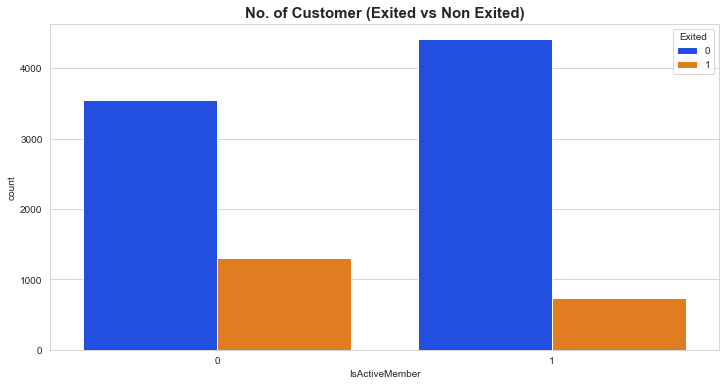

In [206]:
plt.figure(figsize=(12,6))
sns.countplot(x="IsActiveMember",hue="Exited",data=df,palette='bright').set_title("No. of Customer (Exited vs Non Exited)",fontsize=15,fontdict={"weight": "bold"})

In [207]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# CREDIT SCORE

In [208]:
df['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

Text(0.5, 1.0, 'Credit score')

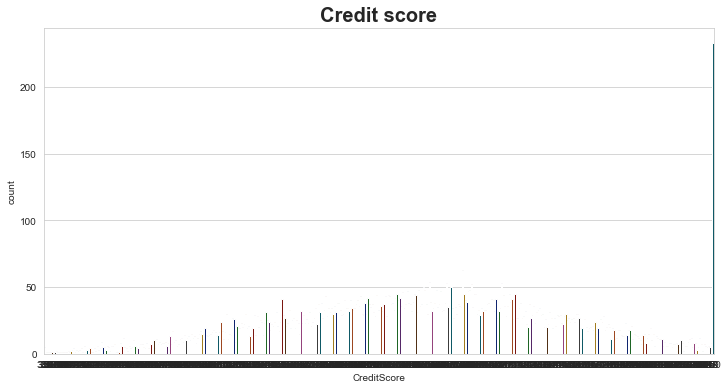

In [209]:
plt.figure(figsize=(12,6))
sns.countplot(x="CreditScore",data=df,palette='dark').set_title("Credit score",fontsize=20,fontdict={"weight": "bold"})

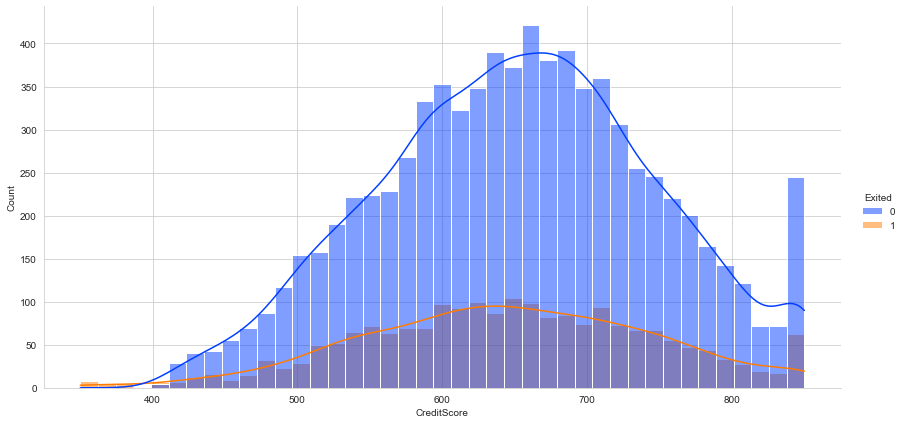

In [210]:
sns.displot(data=df, x="CreditScore",hue="Exited",palette="bright",kind="hist",kde=True,height=6, aspect=2)

# BALANCE

Text(0.5, 1.0, 'No of Customer Balance')

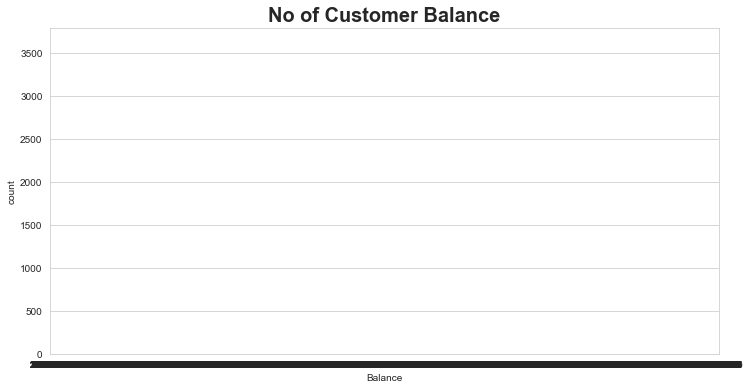

In [214]:
plt.figure(figsize=(12,6))
sns.countplot(x="Balance",data=df,palette='dark').set_title("No of Customer Balance",fontsize=20,fontdict={"weight": "bold"})

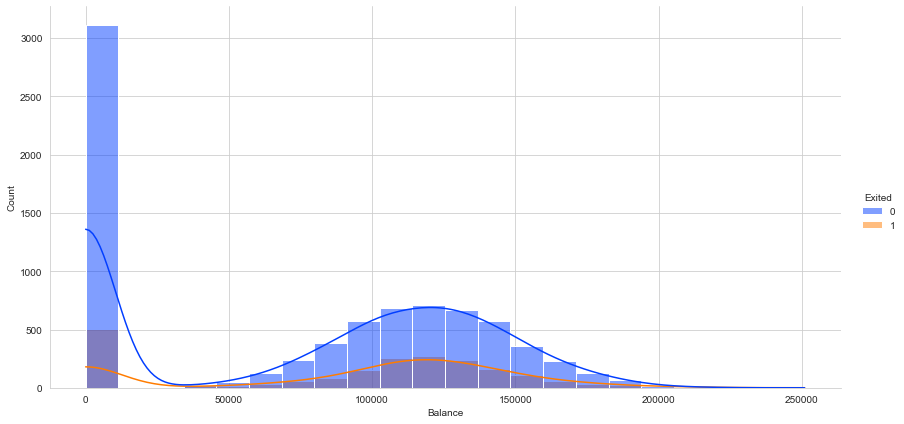

In [215]:
sns.displot(data=df, x="Balance",hue="Exited",kind="hist",kde=True,height=6, aspect=2,palette="bright")

# ESTIMATED SALARY

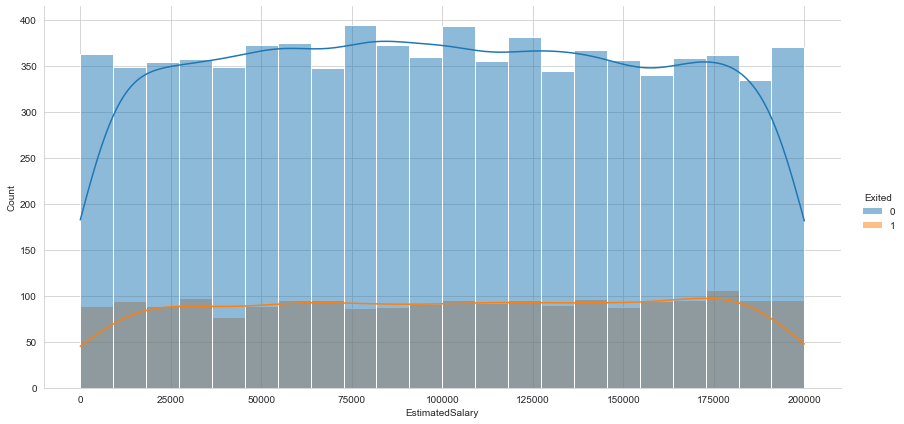

In [216]:
sns.displot(data=df, x="EstimatedSalary",hue="Exited",kind="hist",kde=True,height=6, aspect=2)